# SVM classifier model

## Preprocessing, Visualisation

Visualisation renders insight gain ease. By the way, two dimensional reduction allows visualisation ease but is not granted that preprocessed data yield better results.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree


import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataSet_clean = True

if (dataSet_clean == True):
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_clean.pkl', 'rb')
else:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_noised.pkl', 'rb')
#end

DataSet = pickle.load(fileID)
fileID.close()

X = DataSet[0]
Y = DataSet[1]

print(type(X)," Dim: ",X.shape,"\n",X)
print(type(Y)," Dim: ",Y.shape,"\n",Y)
print("\n")

y = np.asarray([[j+1 for j in range(Y.shape[1]) if Y[i,j] != 0] for i in range(X.shape[0])]).astype(int)

dataSet = np.concatenate( (X, y) , axis = 1)
dataSet

<class 'numpy.ndarray'>  Dim:  (2000, 1023) 
 [[ 1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
<class 'numpy.ndarray'>  Dim:  (2000, 32) 
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]




array([[ 1.,  1., -1., ..., -1., -1.,  1.],
       [-1., -1.,  1., ..., -1., -1.,  2.],
       [-1., -1.,  1., ..., -1., -1.,  3.],
       ...,
       [ 1.,  1., -1., ..., -1., -1., 16.],
       [ 1.,  1., -1., ..., -1., -1., 25.],
       [-1., -1.,  1., ..., -1., -1., 20.]])

[PCA for viz and prepr sake]("https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60")

In [3]:
rawData = pd.DataFrame(dataSet)
lastIDX = X.shape[1]
rawData.rename(columns = {lastIDX : 'Label'}, inplace = True)

In [4]:
sc = StandardScaler()
X_ = sc.fit_transform(X)

pca = PCA(n_components = 2)
princComp_X = pca.fit_transform(X_)

princComp_df = pd.DataFrame(princComp_X, columns = ['PrincipalComponent 1', 'PrincipalComponent 2'])
princComp_df = pd.concat([princComp_df, rawData[['Label']]], axis = 1)

In [5]:
targets = np.asarray(princComp_df.loc[:,['Label']])
targetSorted = np.unique(targets)

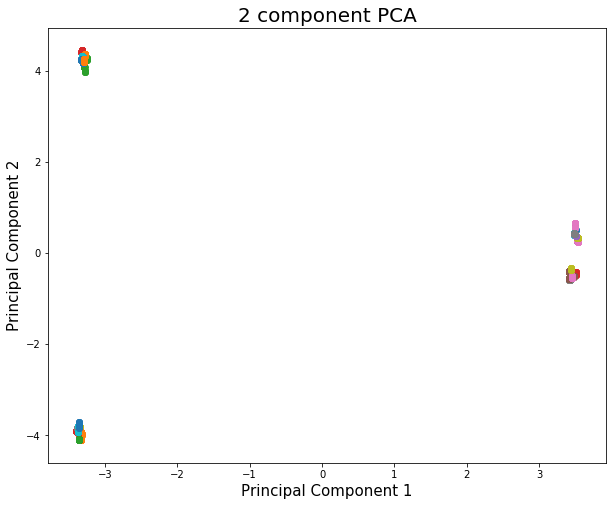

In [7]:
fg1 = plt.figure(figsize=(10,8))
ax = fg1.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for trgt in np.unique(targets):
    idxKeep = princComp_df['Label'] == trgt
    ax.scatter(princComp_df.loc[idxKeep, 'PrincipalComponent 1'],
               princComp_df.loc[idxKeep, 'PrincipalComponent 2'],
               s = 30)
#end
#ax.legend(np.unique(targets).astype(int))

## SVM classification

Preventively check whether or not data is linearly separable. 
In two dimensions it looks that data are such only for $L = 1$ that is two categories.

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3, random_state = 33)
Ytrain = np.ravel(Ytrain)
Ytest = np.ravel(Ytest)

clfSVM = svm.SVC(kernel='linear', gamma='auto', verbose=True)
clfSVM.fit(Xtrain, Ytrain)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [17]:
yPred = clfSVM.predict(Xtest)
scores = clfSVM.score(Xtest, Ytest)
print(scores)
print(accuracy_score(Ytest,yPred))

1.0
1.0


In [18]:
print(confusion_matrix(Ytest, yPred))
print(classification_report(Ytest, yPred, labels = np.unique(yPred)))

[[19  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 19]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00

In [19]:
np.unique(Ytest)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [20]:
np.unique(yPred)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

## Tree Classification

Anche con data set non preprocessato

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3, random_state = 33)
Ytrain = np.ravel(Ytrain)
Ytest = np.ravel(Ytest)

clfTree = tree.DecisionTreeClassifier()
clfTree.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
yPred = clfTree.predict(Xtest)

print(accuracy_score(Ytest,yPred))

1.0


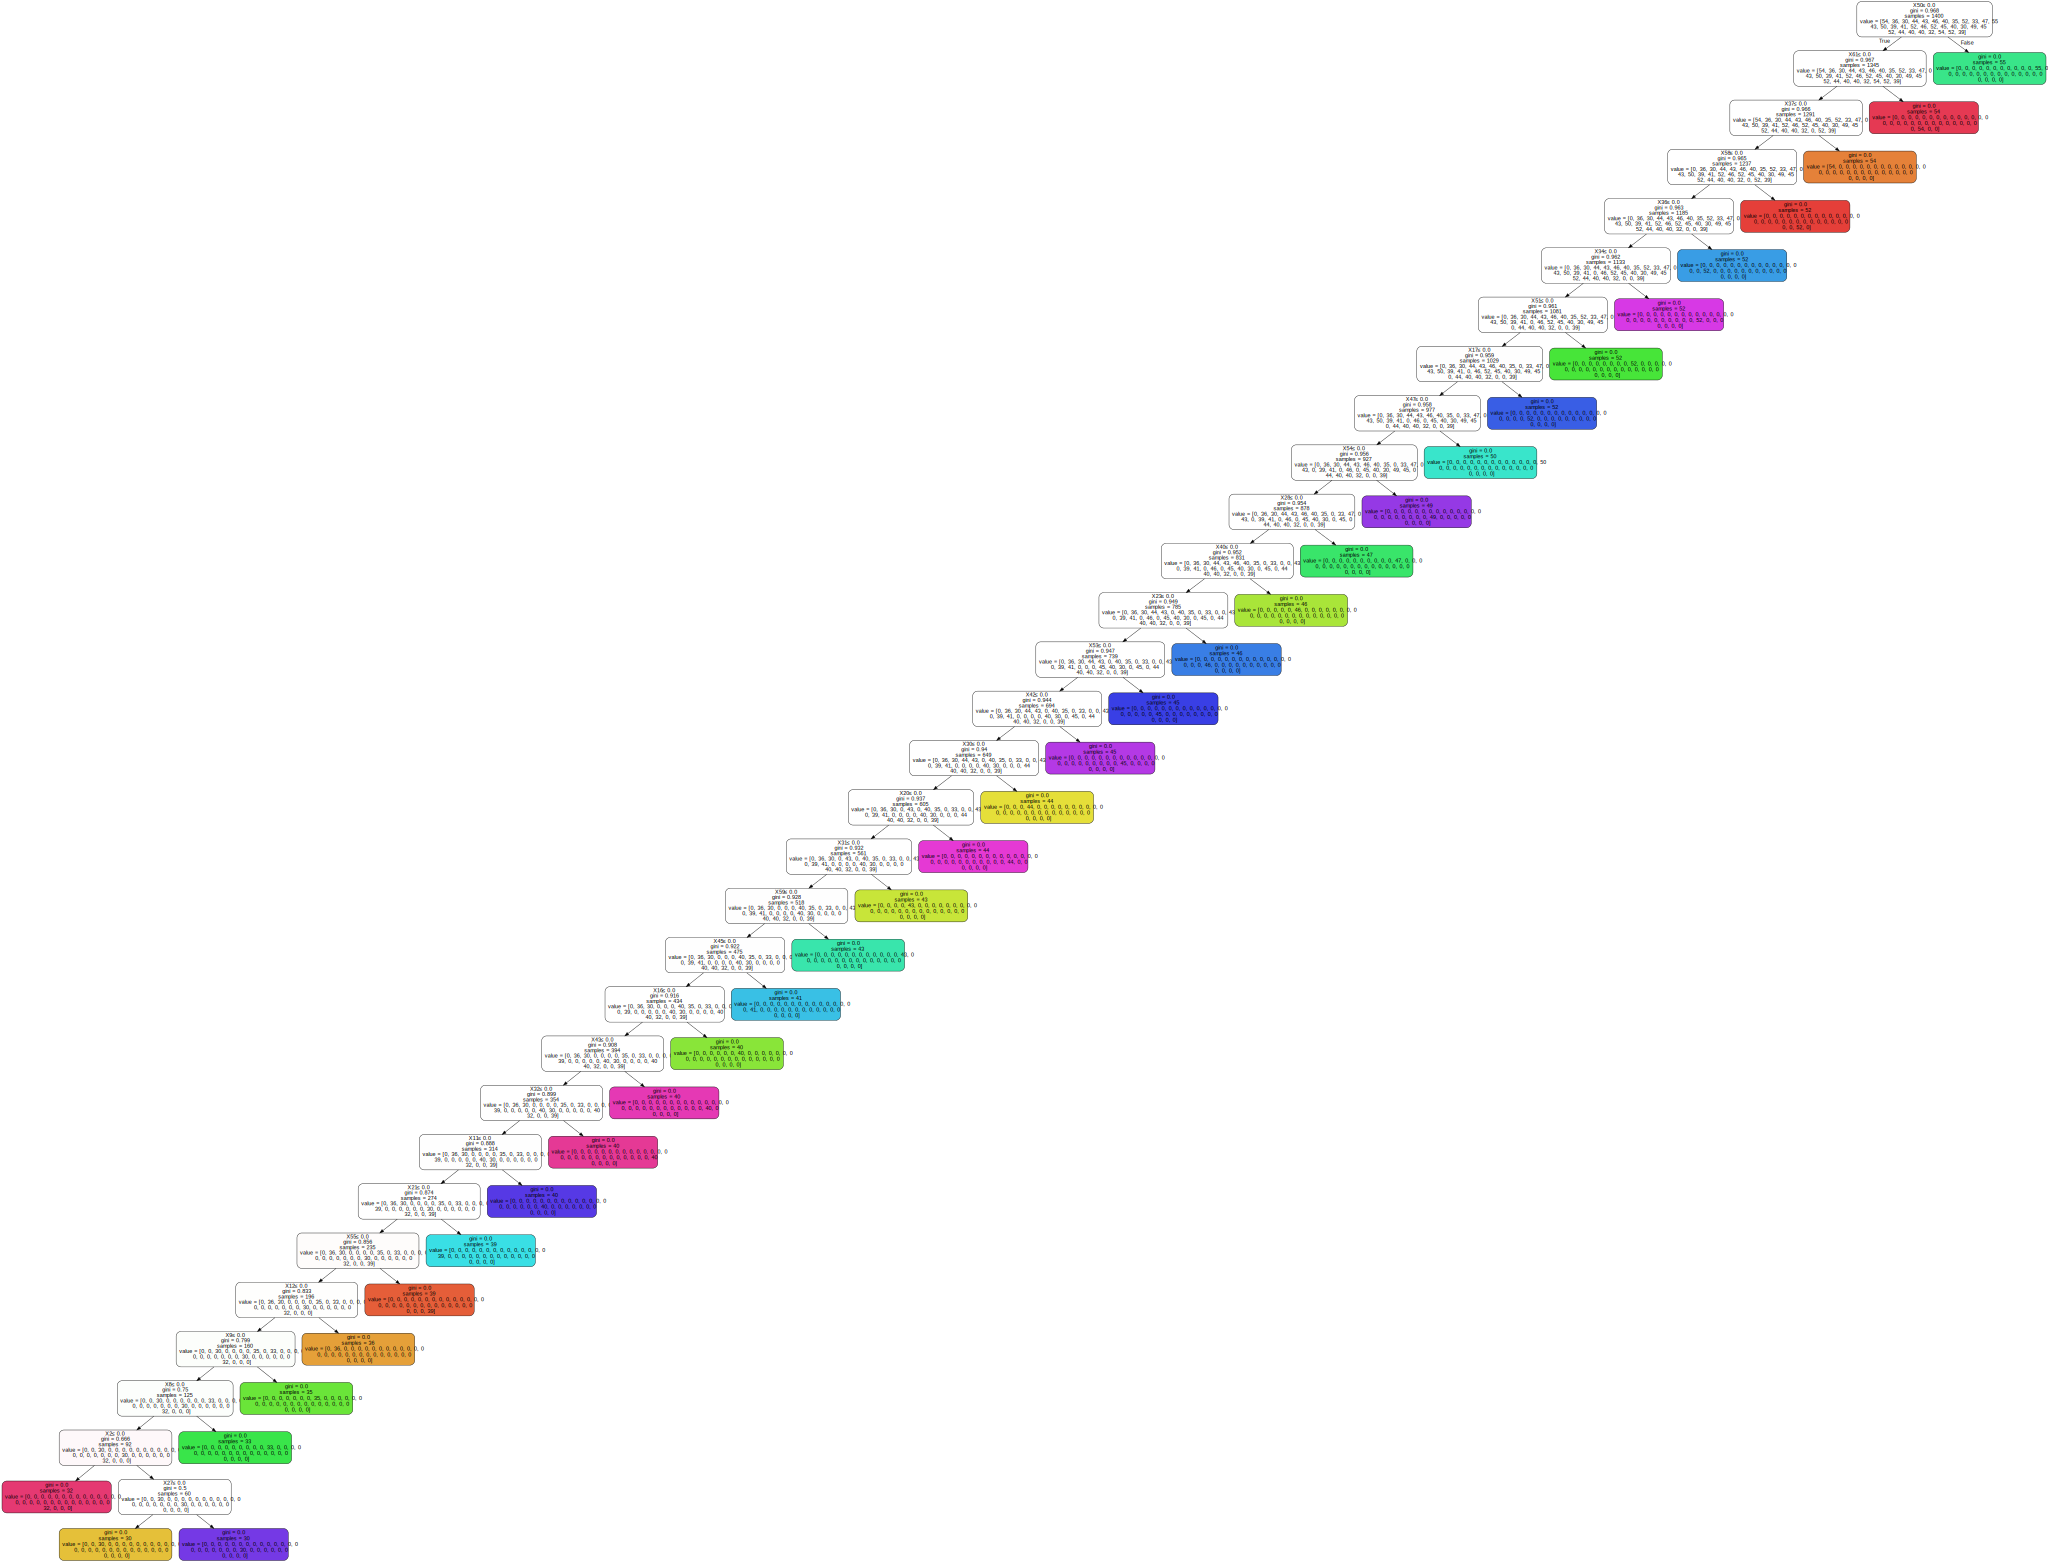

In [15]:
import graphviz

dotData = tree.export_graphviz(clfTree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dotData)
graph